### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import copy
import sys
import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Load collider

In [2]:
# Define study
collider = xt.Multiline.from_json("/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/master_study/scans/injection_oct_scan_for_experiment/base_collider/xtrack_0000/collider.json")

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
collider.build_trackers()

Compiling ContextCpu kernels...


e80413db4fac4152a2fabba088da2de7.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from e80413db4fac4152a2fabba088da2de7.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


5898adb6ceec496d9ae2a527ee1488b9.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 5898adb6ceec496d9ae2a527ee1488b9.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Twiss and plot

In [4]:
tw_b1 = collider.lhcb1.twiss()

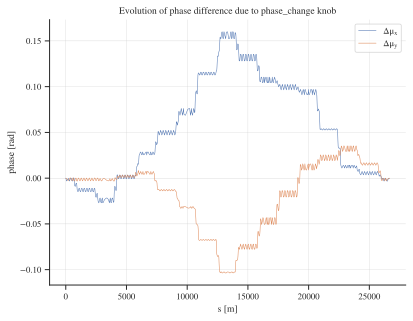

In [8]:
collider.vars['phase_change.b1'] = 1.
collider.vars['phase_change.b2'] = 1.
tw_b1_phase_change = collider.lhcb1.twiss()
s = tw_b1_phase_change[['s']]
mux_phase_change = tw_b1_phase_change[['mux']]
muy_phase_change = tw_b1_phase_change[['muy']]

# plt.plot(tw_b1[['s']], tw_b1[['mux']], label = 'mux (phase change)')
# plt.plot(tw_b1[['s']], tw_b1[['muy']], label = 'muy (phase change)')
# mu1 = copy.deepcopy(tw_b1[['mux']])

collider.vars['phase_change.b1'] = 0.
collider.vars['phase_change.b2'] = 0.
tw_b1_no_phase_change = collider.lhcb1.twiss()

mux_no_phase_change = tw_b1_no_phase_change[['mux']]
muy_no_phase_change = tw_b1_no_phase_change[['muy']]

plt.plot(s, mux_phase_change - mux_no_phase_change, label = r'$ \Delta \mu_x$')
plt.plot(s, muy_phase_change - muy_no_phase_change, label = r'$ \Delta \mu_y$')
plt.title('Evolution of phase difference due to phase_change knob')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('phase [rad]')
plt.legend()
plt.savefig('phase_change_knob.png', dpi=300)
plt.show()

In [6]:
print(np.sum(mu1-mu2))

NameError: name 'mu1' is not defined

In [ ]:
collider.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines



In [ ]:
collider.lhcb1.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines

